In [1]:
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
import os

In [2]:
def process_file(filename):
    # Read data
    with open(filename) as file:
        data = file.readlines()
    data = map(lambda x: x.strip().split(','), data[2:])
    data = list(map(lambda x: (float(x[2]), float(x[0]), int(x[1])), data))
    return data

In [3]:
def get_data(directory, threads):
    filenames = []
    data = []
    time_begin = 0
    for path, _, files in os.walk(directory):
        for name in files:
            if name.endswith('.csv'):
                filenames.append(os.path.join(path, name))
        if len(filenames) == threads:
            batch_data = []
            for filename in filenames:
                for time, reward, length in process_file(filename):
                    batch_data.append((time + time_begin, reward, length))
            batch_data.sort()
            time_begin = batch_data[-1][0]
            data.extend(batch_data)
            filenames = []
    data.sort()
    return zip(*data)

In [8]:
def plot(directory, plot_name='', threads=4):
    times, rewards, lengths = get_data(directory, threads)
    
    # Calculate timesteps
    iterlengths = iter(lengths)
    timesteps = [next(iterlengths)]
    for length in iterlengths:
        timesteps.append(timesteps[-1] + length)

    # Calculate reward/timestep
    reward_per_timestep = []
    for reward, length in zip(rewards, lengths):
        reward_per_timestep.append(reward/length)
    
    # Apply Savitzky–Golay filter to smooth data
    rewards_smooth = scipy.signal.savgol_filter(rewards, 1001, 2)
    lengths_smooth = scipy.signal.savgol_filter(lengths, 1001, 2)
    reward_per_timestep_smooth = scipy.signal.savgol_filter(reward_per_timestep, 201, 2)
    
    fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(20, 4))
    
    ax1.set_ylim(bottom=-12, top=30)
    #ax1.set_xlabel('Time (s)')
    ax1.set_xlabel('Timestep')
    ax1.plot(timesteps, rewards)
    ax1.plot(timesteps, rewards_smooth, color='red')
    ax1.set_title('Reward: ' + plot_name)
    ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    
    ax2.set_ylim(top=400)
    #ax2.set_xlabel('Time (s)')
    ax2.set_xlabel('Timestep')
    ax2.plot(timesteps, lengths)
    ax2.plot(timesteps, lengths_smooth, color='red')
    ax2.set_title('Episode Length: ' + plot_name)
    ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    ax3.set_ylim(bottom=-3, top=1)
    #ax3.set_xlabel('Time (s)')
    ax3.set_xlabel('Timestep')
    ax3.plot(timesteps, reward_per_timestep)
    ax3.plot(timesteps, reward_per_timestep_smooth, color='red')
    ax3.set_title('Reward/Timestep: ' + plot_name)
    ax3.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    print(len(timesteps))

34533
403527
106111


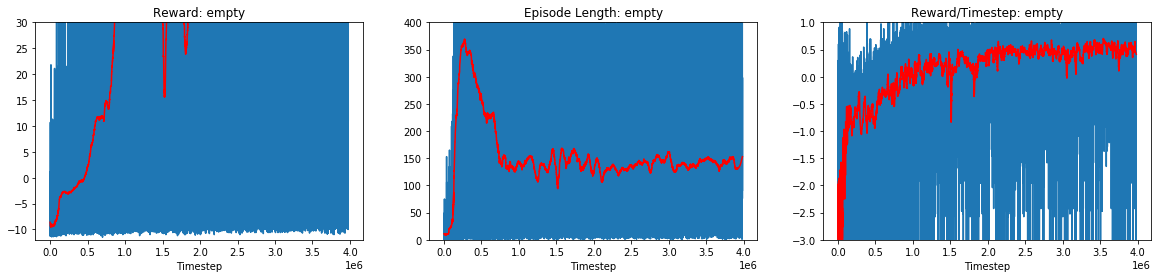

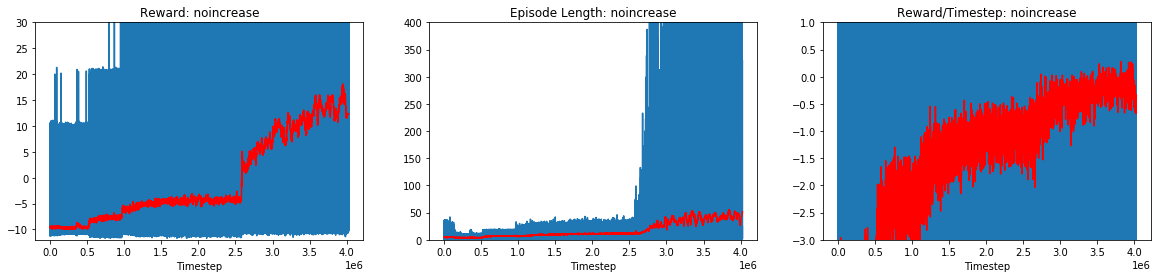

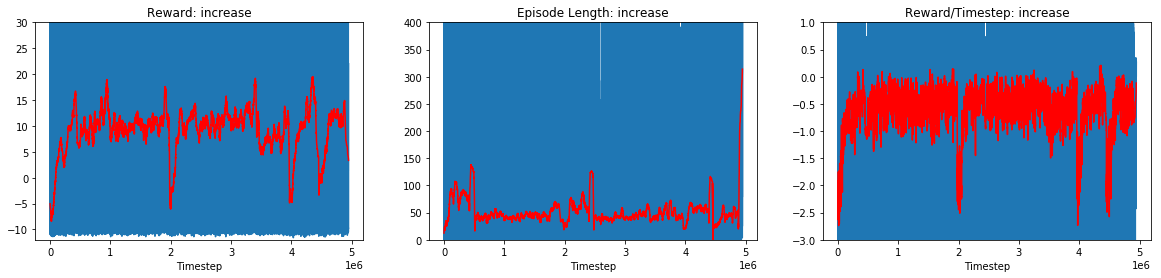

In [9]:
#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_0/tail_length_0_noincrease_1M', plot_name='No Increase')
#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_0/tail_length_0_increase_1M', plot_name='Increase')

#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_0/tail_length_0_empty_1M/', plot_name='Empty 1M')
#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_0/tail_length_0_empty_5M', plot_name='Empty 5M')

#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_random/empty_map', plot_name='Empty')
#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_random/no_increase', plot_name='No Increase')
#plot('/home/oskar/kth/kex/simple-env/experiments/monitor/tail_length_random/increase', plot_name='Increase')

#plot('/home/oskar/experiments10apr/monitor/test_4_8_8_64', plot_name='test_4_8_8_64')
#plot('/home/oskar/experiments10apr/monitor/test_16_32_32_64', plot_name='test_16_32_32_64')
#plot('/home/oskar/kth/kex/simple-env/monitor/test_16_32_32_128', plot_name='test_16_32_32_128')

for name in ('empty', 'noincrease', 'increase'):
    plot(f'/home/oskar/kth/kex/simple-env/experiments/tail_length_0_16_32_32_512_5M/5M_{name}_16_32_32_512', plot_name=name)